<a href="https://colab.research.google.com/github/RebatiGaire/Simulation-And-Modeling/blob/master/Auto_Correlation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import Libraries

import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
rn = [49, 95, 82, 19, 41, 31, 12, 53, 62, 40,
      87, 83, 26, 1, 91, 55, 38, 75, 90, 35,
      71, 57, 27, 85, 52, 8, 35, 57, 88, 38,
      77, 86, 29, 18, 9, 96, 58, 22, 8, 93,
      85, 45, 79, 68, 20, 11, 78, 93, 21, 13,
      6, 32, 63, 79, 54, 67, 35, 18, 81, 40,
      62, 13, 76, 74, 76, 45, 29, 36, 80, 78,
      95, 25, 52]

Text(0, 0.5, 'Value')

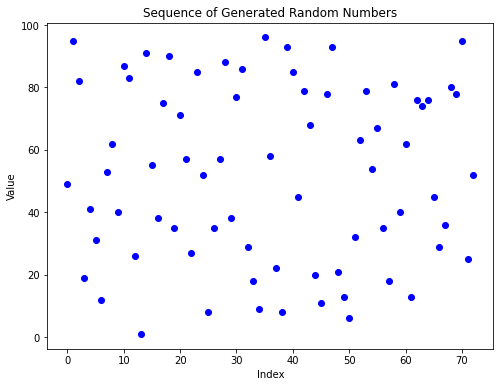

In [11]:
# Data Visualization

plt.figure(figsize= (8, 6))
plt.plot(rn, 'bo')
plt.title('Sequence of Generated Random Numbers')
plt.xlabel('Index')
plt.ylabel('Value')

In [12]:
def seq_to_freq(data, div_num):
  div_arr = np.array([round((i+1)/div_num, 2) for i in range(div_num)])
  print(f'Dividing Array : {div_arr}')
  obs_freq = np.zeros(shape= (div_num**2))
  for i in range(len(data) - 1):
    r1 = data[i]
    r2 = data[i+1]
    if (r1 <= div_arr[0] and r2 <= div_arr[0]):
      obs_freq[0] += 1

    elif (r1 <= div_arr[1] and r2 <= div_arr[0]):
      obs_freq[1] += 1

    elif (r1 <= div_arr[2] and r2 <= div_arr[0]):
      obs_freq[2] += 1

    elif (r1 <= div_arr[0] and r2 <= div_arr[1]):
      obs_freq[3] += 1

    elif (r1 <= div_arr[1] and r2 <= div_arr[1]):
      obs_freq[4] += 1

    elif (r1 <= div_arr[2] and r2 <= div_arr[1]):
      obs_freq[5] += 1

    elif (r1 <= div_arr[0] and r2 <= div_arr[2]):
      obs_freq[6] += 1

    elif (r1 <= div_arr[1] and r2 <= div_arr[2]):
      obs_freq[7] += 1

    elif (r1 <= div_arr[2] and r2 <= div_arr[2]):
      obs_freq[8] += 1

  return obs_freq


In [13]:
def chi_square_test(data, sample_size, no_of_classes, div_num):

  obs_freq = seq_to_freq(data, div_num)
  # obs_freq = np.array([9, 7, 6, 6, 8, 9, 7, 9, 11])
  exp_freq = np.full(shape= (no_of_classes), fill_value= sample_size / no_of_classes)
  print(f'Observed Frequency : {obs_freq}')
  print(f'Expected Frequency : {exp_freq}')
  chisquare_value = (((obs_freq - exp_freq)**2) / exp_freq).sum()

  return chisquare_value

In [14]:
rn = np.array(rn) / 100
print(f'Sample Size : {len(rn)}')

div_no = 3
sample_pair = len(rn) - 1
no_of_classes = div_no ** 2

alpha = 0.05
dof = no_of_classes - 2

Sample Size : 73


In [15]:
cal_chisquare = chi_square_test(rn, sample_pair, no_of_classes, div_no)
critical_chisquare = chi2.isf(df= dof, q= alpha)


print(f"Calculated Chi-Square value : {cal_chisquare}")
print(f"Critical Chi-Square value : {critical_chisquare}")
if (cal_chisquare <= critical_chisquare):
  print("Not enough evidences to reject Null Hypothesis i.e. The generated sequence of Random Number is not serially auto-correlated.")
else:
  print("Null Hypothesis is rejected i.e. The generated sequence of Random Number is serially auto-correlated")


Dividing Array : [0.33 0.67 1.  ]
Observed Frequency : [ 9.  7.  6.  6.  7. 10.  7.  9. 11.]
Expected Frequency : [8. 8. 8. 8. 8. 8. 8. 8. 8.]
Calculated Chi-Square value : 3.25
Critical Chi-Square value : 14.067140449340167
Not enough evidences to reject Null Hypothesis i.e. The generated sequence of Random Number is not serially auto-correlated.
